<a href="https://colab.research.google.com/github/aschelin/SimulacoesAGFE/blob/main/SC_EDO_sistemasequacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas de EDOs

Considere o sistema abaixo:

\begin{equation}
\begin{aligned}
\dot{x} &= f(t,x(t),y(t)) \\
\dot{y} &= g(t,x(t),y(t))
\end{aligned}
\end{equation}

com $x(t=0)=x_0$ e $y(t=0)=y_0$.

Como podemos resolver esse sistema de EDOs numéricamente? A seguir, vamos mostrar alguns exemplos.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

## Exemplo 1
Resolva o seguinte sistema de equações diferenciais ordinárias com valores iniciais:
\begin{equation}
\begin{aligned}
\dot{x} &= -y(t) \\
\dot{y} &= x(t)
\end{aligned}
\end{equation}
com $x(t=0)=1$ e $y(t=0)=0$.
Use o método de Euler para achar a sua solução aproximada. 


In [ ]:
f = lambda t,x,y: -y
g = lambda t,x,y: x 

In [ ]:
# Parametros 

h = 1e-4
tfim = 10
nt = int(tfim/h)
x0 = 1
y0 = 0
s0 = [x0,y0]

In [ ]:
def Euler2D(f,g,h,s0,tmax=10):
  nt = int(tmax/h)
  x = np.zeros(nt)
  y = np.zeros(nt)
  tempo = np.linspace(0,tmax,nt)
  x[0] = s0[0]
  y[0] = s0[1]

    
  for k in np.arange(1,nt):
      x[k] = x[k-1] + h*f(tempo[k-1],x[k-1],y[k-1]) 
      y[k] = y[k-1] + h*g(tempo[k-1],x[k-1],y[k-1])

  return tempo,x,y

In [ ]:
tempo, x_num, y_num = Euler2D(f,g,h,s0,tfim)

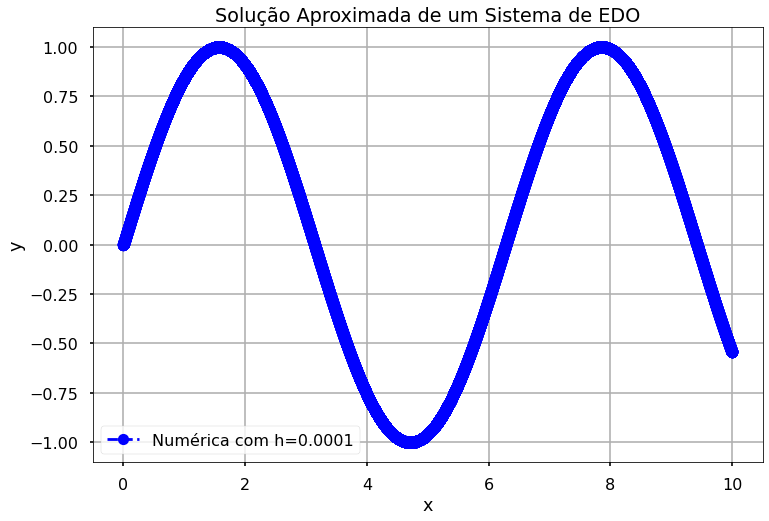

In [ ]:
  plt.figure(figsize = (12, 8))
  plt.plot(tempo, y_num, 'bo--', label='Numérica com h={}'.format(h))
  plt.title('Solução Aproximada de um Sistema de EDO')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.legend(loc='lower left')
  plt.show() 

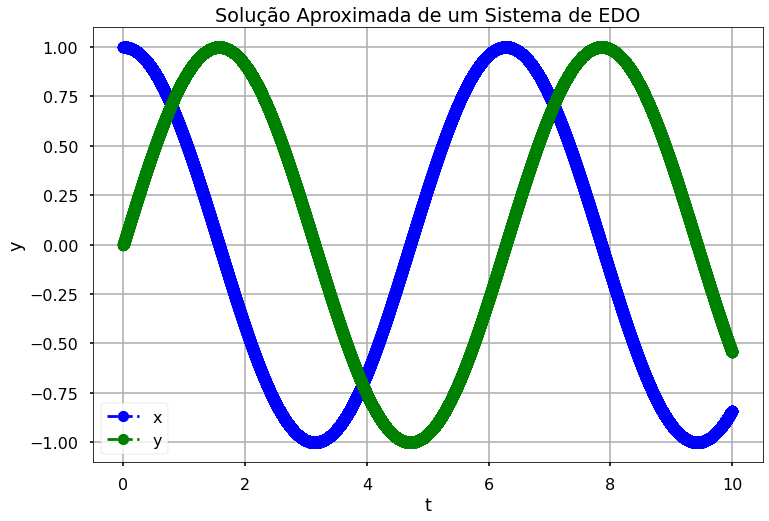

In [ ]:
  plt.figure(figsize = (12, 8))
  plt.plot(tempo, x_num, 'bo--', label='x')
  plt.plot(tempo, y_num, 'go--', label='y')
  plt.title('Solução Aproximada de um Sistema de EDO')
  plt.xlabel('t')
  plt.ylabel('y')
  plt.grid()
  plt.legend(loc='lower left')
  plt.show() 

Para generalizar, vamos criar uma função *derivadas* para colocar as funções na forma vetorial:


In [ ]:
def derivadas(t,X):
  F = np.zeros(len(X))
  F[0] = -X[1] # xdot = -y
  F[1] = X[0]  # ydot = x


  return F


In [ ]:
def Euler_geral(derivadas,h,s0,tmax=10):
  nt = int(tmax/h)
  X = np.zeros([nt,len(s0)])
  tempo = np.linspace(0,tmax,nt)
  X[0,:] = s0
    
  for k in np.arange(1,nt):
      F = derivadas(tempo[k-1],X[k-1,:])
      X[k,:] = X[k-1,:] + h*F[:] 


  return tempo,X

In [ ]:
tempo,X = Euler_geral(derivadas,h,[1,0],tmax=1)

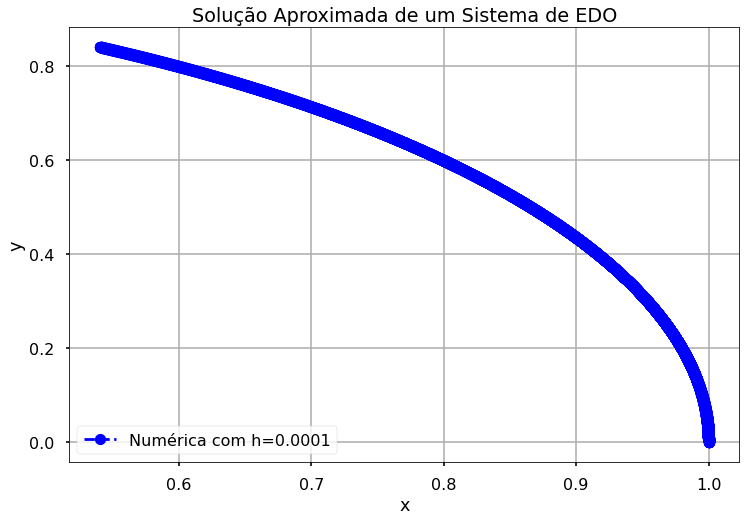

In [ ]:
  plt.figure(figsize = (12, 8))
  plt.plot(X[:,0],X[:,1], 'bo--', label='Numérica com h={}'.format(h))
  plt.title('Solução Aproximada de um Sistema de EDO')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.legend(loc='lower left')
  plt.show() 

## Exemplo 2 


Resolva o seguinte sistema de equações diferenciais ordinárias com valores iniciais:
\begin{equation}
\begin{aligned}
\dot{x} &= -y(t) \\
\dot{y} &= x(t)
\end{aligned}
\end{equation}
com $x(t=0)=1$ e $y(t=0)=0$.
Use o método de Euler **modificado** para achar a sua solução aproximada. 

In [ ]:
def Euler_mod_geral(derivadas,h,s0,tmax=10):
  nt = int(tmax/h)
  X = np.zeros([nt,2])
  tempo = np.linspace(0,tmax,nt)
  X[0,:] = s0
    
  for k in np.arange(1,nt):
      F = derivadas(tempo[k-1],X[k-1,:])
      kx1 = F[0] 
      ky1 = F[1]

      x_euler = X[k-1,0] + h*kx1
      y_euler = X[k-1,1] + h*ky1

      Fnew = derivadas(tempo[k],[x_euler,y_euler])

      kx2 = Fnew[0] 
      ky2 = Fnew[1]

      X[k,0] = X[k-1,0] + h*(kx1+kx2)/2 
      X[k,1] = X[k-1,1] + h*(ky1+ky2)/2
  return tempo,X


In [ ]:
# Parametros 

h = .1
tfim = 10
nt = int(tfim/h)
x0 = 1
y0 = 0
s0 = [x0,y0]

# Rodar o integrador
tempo, X  = Euler_mod_geral(derivadas,h,s0,tmax=10)

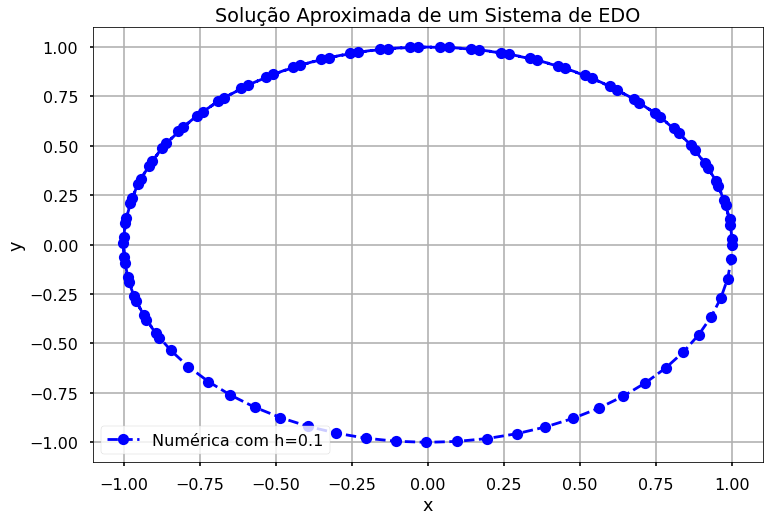

In [ ]:
  plt.figure(figsize = (12, 8))
  plt.plot(X[:,0],X[:,1], 'bo--', label='Numérica com h={}'.format(h))
  plt.title('Solução Aproximada de um Sistema de EDO')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.legend(loc='lower left')
  plt.show() 

## Tarefa
Resolva o seguinte sistema de equações diferenciais ordinárias com valores iniciais:
\begin{equation}
\begin{aligned}
\dot{x} &= -x(t)-y(t) \\
\dot{y} &= x(t)-y(t)^3
\end{aligned}
\end{equation}

com $x(t=0)=1$ e $y(t=0)=0$.
Use o método de Euler **modificado** para achar a sua solução aproximada. 

In [ ]:
def derivadas(t,X):
  F = np.zeros(len(X))
  F[0] = -X[0]-X[1]
  F[1] = X[0]-X[1]**3
  return F

In [ ]:
# Parametros 

h = 1e-2
tfim = 1
nt = int(tfim)/h
x0 = 1
y0 = 0
s0 = [x0,y0]
X=[]
# Rodar o integrador
tempo, X  = Euler_mod_geral(derivadas,h,s0,tmax=10)

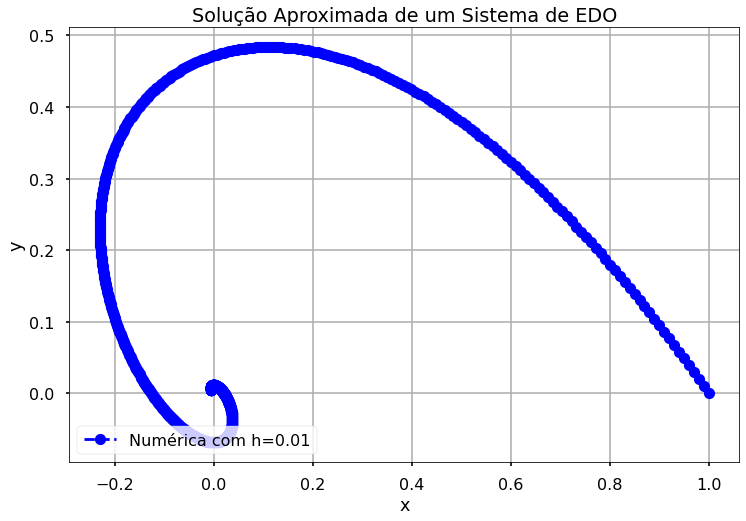

In [ ]:
  plt.figure(figsize = (12, 8))
  plt.plot(X[:,0],X[:,1], 'bo--', label='Numérica com h={}'.format(h))
  plt.title('Solução Aproximada de um Sistema de EDO')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.legend(loc='lower left')
  plt.show() 

# Modelo SIR

O Sistema de EDOs a seguir modela epidemeologicamente a propagação de uma doença (como a covid19). Considere $S(t)$ o número de indivíduos *susceptíveis* à infecção. $I(t)$ corresponde ao número de pessoas infectadas e $R(t)$ o número de indivíduos recuperados. 


\begin{equation}
\begin{aligned}
S^{\prime } &= -\beta S I \\
I^{\prime } &= \beta S I - \gamma I \\
R^{\prime } &= \gamma I
\end{aligned}
\end{equation}

onde o parâmetros $\beta$ correspode à taxa de contaminação e $\gamma$ à probabilidade de um indivíduo se recuperar em um intervalo de tempo.


In [ ]:
def derivadas_SIR(t,X,params=[0,0]):
  F = np.zeros(len(X))
  beta = params[0]
  gamma = params[1]
  F[0] = -beta*X[0]*X[1]
  F[1] = beta*X[0]*X[1]-gamma*X[1]
  F[2] = gamma*X[1]
  return F


In [ ]:
def Euler_geral_D(derivadas,params,h,s0,tmax=10):
  nt = int(tmax/h)
  X = np.zeros([nt,len(s0)])
  tempo = np.linspace(0,tmax,nt)
  X[0,:] = s0
    
  for k in np.arange(1,nt):
      F = derivadas(tempo[k],X[k-1,:],params)
      X[k,:] = X[k-1,:] + h*F[:] 

  return tempo,X

In [ ]:
beta = 10/(40*8*24)
gamma = 3/(15*24)
params = [beta,gamma]
s0 = [50,1,0]
h=1e-2
tmax = 800

tempo,X = Euler_geral_D(derivadas_SIR,params,h,s0,tmax)


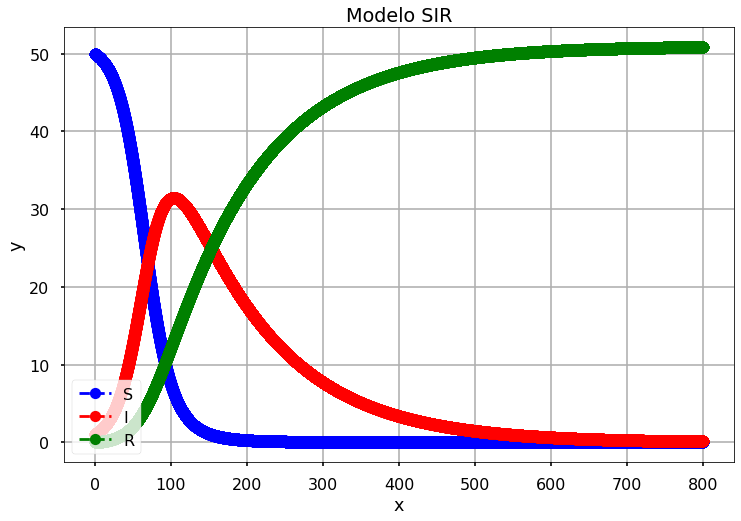

In [ ]:

plt.figure(figsize = (12, 8))
plt.plot(tempo,X[:,0], 'bo--', label='S')
plt.plot(tempo,X[:,1], 'ro--', label='I')
plt.plot(tempo,X[:,2], 'go--', label='R')
plt.title('Modelo SIR')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='lower left')
plt.show() 